# Introduction to Linear Algebra and the world of probablitites

In this work-sheet, we shall do two activities. First of all we shall check the power of SVD. Then we shall check how may we generate data from an arbitrary distribution (given that we have the ability to generate data from a uniform distribution).

## Singular Value Decomposition
Lets load an image and try to do it's SVD.

Please note the way to access an image from your Google drive. Change the code accordingly (and load an image in your Google drive) to access to your own image!

Mark that we shall be using PIL's Image library, a useful set of powerful algorithms for image processing.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

Lets load the image and convert that to a gray-scale version (so that we can treat it just like a 2D matrix). What will happen if its not gray-scale? 

It's not a single value anymore so single value decomposition won't work in this format (it expects a 2D matrix)

using local pc paths (easier), going to be working on 2 pictures simultaneously, sen-2 screenshots taken from GEE

the areas of interest are Krakow center as the urban area and some patch of land north of Hrubieszow in Lubelskie voivodeship as the rural area

In [2]:
img_krk = Image.open("krk.png")
imggray_krk = img_krk.convert('L')

img_lub = Image.open("lub.png")
imggray_lub = img_lub.convert('L')

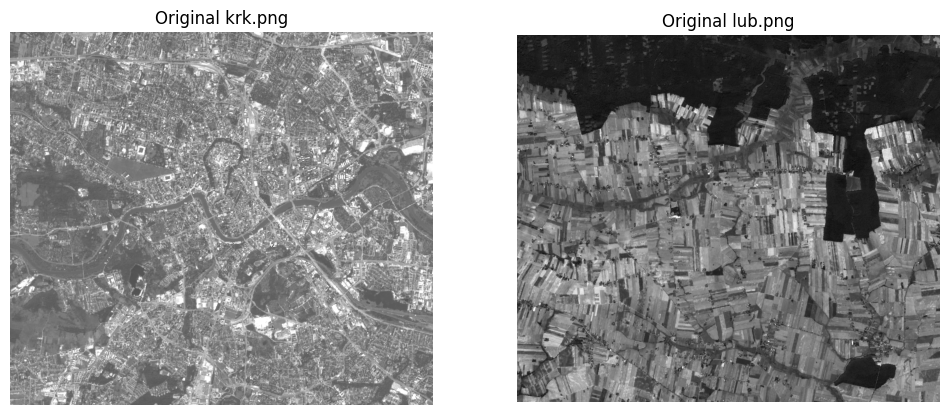

In [3]:
imgmat_krk = np.array(list(imggray_krk.getdata(band=0)), float)
imgmat_krk.shape = (imggray_krk.size[1], imggray_krk.size[0])
imgmat_krk = np.matrix(imgmat_krk)

imgmat_lub = np.array(list(imggray_lub.getdata(band=0)), float)
imgmat_lub.shape = (imggray_lub.size[1], imggray_lub.size[0])
imgmat_lub = np.matrix(imgmat_lub)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original krk.png')
plt.imshow(imgmat_krk, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Original lub.png')
plt.imshow(imgmat_lub, cmap='gray')

### SVD

We can directly use the $svd$ command from Numpy to operate SVD on the matrix.

Lets first check how the image will look if we only use a single vector to reconstruct the image.

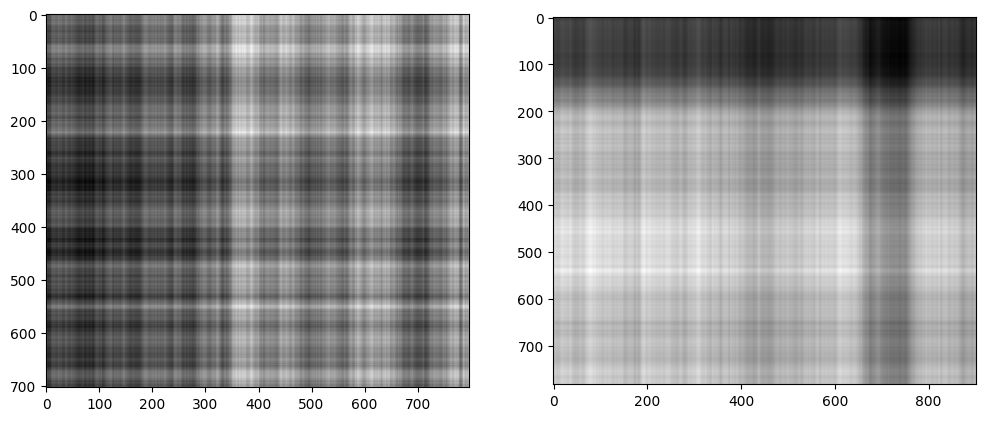

In [4]:
U_krk, sigma_krk, V_krk = np.linalg.svd(imgmat_krk)
reconstimg_krk = np.matrix(U_krk[:, :1]) * np.diag(sigma_krk[:1]) * np.matrix(V_krk[:1, :])

U_lub, sigma_lub, V_lub = np.linalg.svd(imgmat_lub)
reconstimg_lub = np.matrix(U_lub[:, :1]) * np.diag(sigma_lub[:1]) * np.matrix(V_lub[:1, :])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(reconstimg_krk, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(reconstimg_lub, cmap='gray')


Now lets check how does the sigma vector look like.

What do you observe? The lines are a little less steep, meaning we have more complexity compared to the test image previously discussed in class.

How many vectors can we use to get a decent reconstruction of the image? For both sen-2 images, around 100 was the mark where it stopped being terrible.

What will happen if we omit the first 1-2 vectors (corresponding to the largest eigen values)?
The image gets blurry. In this instance, the fields did better than urban area, which did better than forests (those are barely recognizeable)

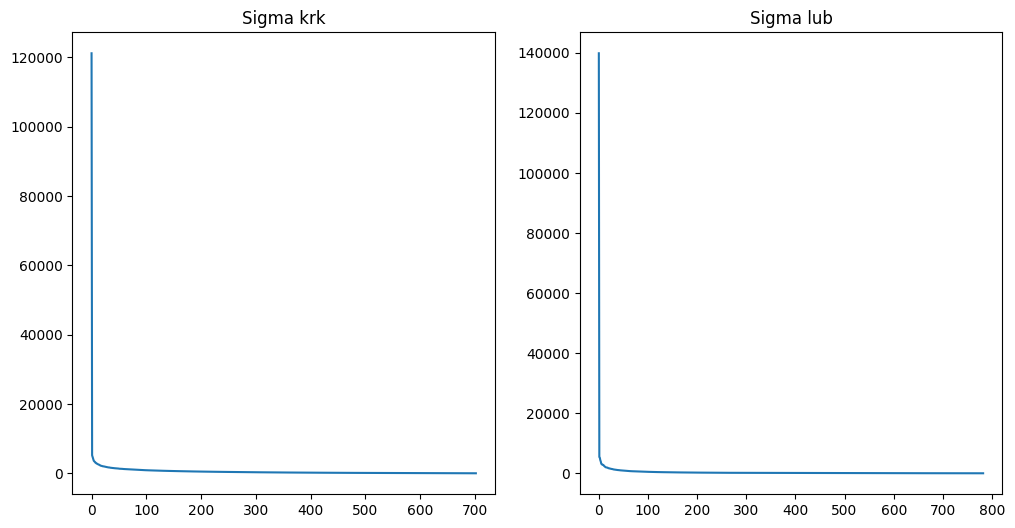

In [5]:
U_krk.shape
sigma_krk.shape
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Sigma krk')
plt.plot(sigma_krk)
plt.subplot(1, 2, 2)
plt.title('Sigma lub')
plt.plot(sigma_lub)

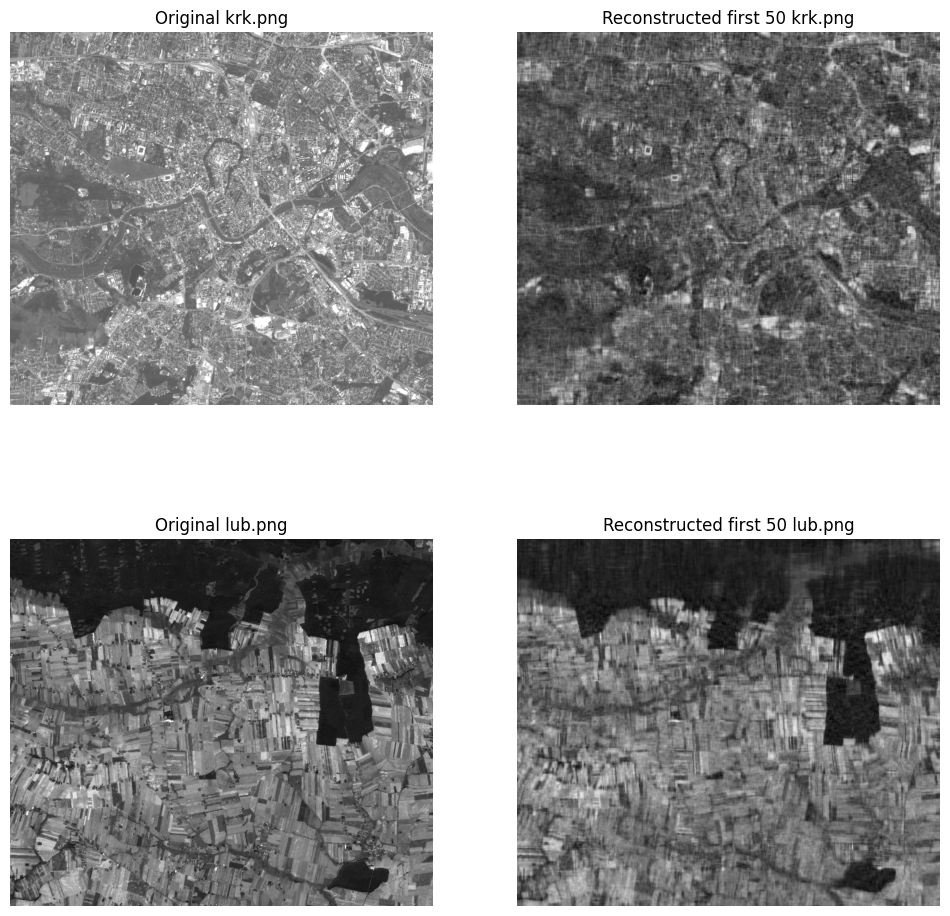

In [6]:
i = 50
j = 0
reconstimg_krk = np.matrix(U_krk[:, j:i]) * np.diag(sigma_krk[j:i]) * np.matrix(V_krk[j:i, :])
reconstimg_lub = np.matrix(U_lub[:, j:i]) * np.diag(sigma_lub[j:i]) * np.matrix(V_lub[j:i, :])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Original krk.png')
plt.imshow(imgmat_krk, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Reconstructed first 50 krk.png')
plt.imshow(reconstimg_krk, cmap='gray')

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Original lub.png')
plt.imshow(imgmat_lub, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Reconstructed first 50 lub.png')
plt.imshow(reconstimg_lub, cmap='gray')


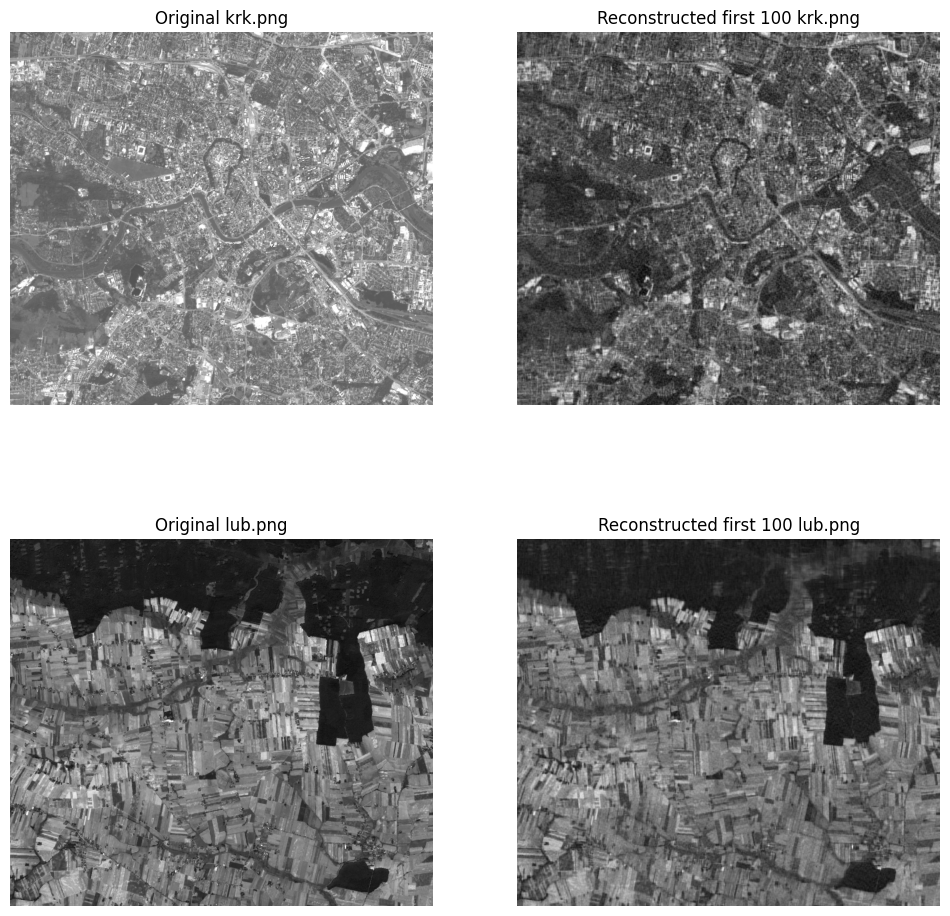

In [7]:
i = 100
j = 0
reconstimg_krk = np.matrix(U_krk[:, j:i]) * np.diag(sigma_krk[j:i]) * np.matrix(V_krk[j:i, :])
reconstimg_lub = np.matrix(U_lub[:, j:i]) * np.diag(sigma_lub[j:i]) * np.matrix(V_lub[j:i, :])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Original krk.png')
plt.imshow(imgmat_krk, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Reconstructed first 100 krk.png')
plt.imshow(reconstimg_krk, cmap='gray')

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Original lub.png')
plt.imshow(imgmat_lub, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Reconstructed first 100 lub.png')
plt.imshow(reconstimg_lub, cmap='gray')


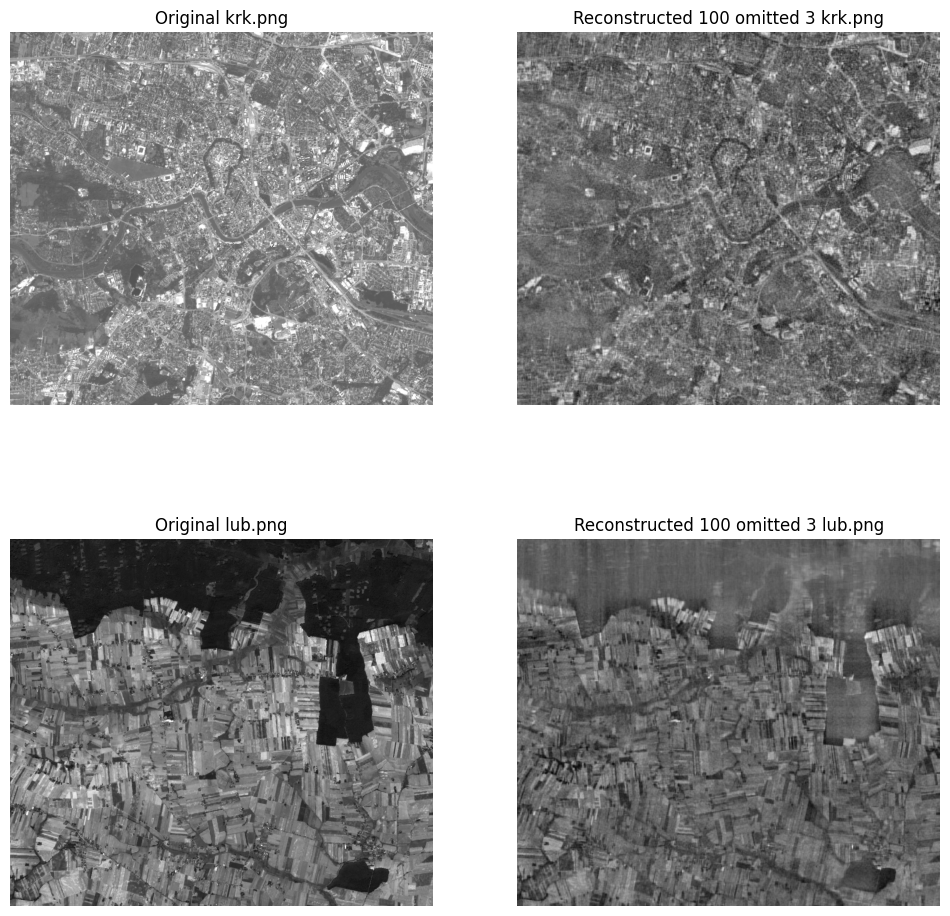

In [8]:
i = 100
j = 3
reconstimg_krk = np.matrix(U_krk[:, j:i]) * np.diag(sigma_krk[j:i]) * np.matrix(V_krk[j:i, :])
reconstimg_lub = np.matrix(U_lub[:, j:i]) * np.diag(sigma_lub[j:i]) * np.matrix(V_lub[j:i, :])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Original krk.png')
plt.imshow(imgmat_krk, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Reconstructed 100 omitted 3 krk.png')
plt.imshow(reconstimg_krk, cmap='gray')

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Original lub.png')
plt.imshow(imgmat_lub, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Reconstructed 100 omitted 3 lub.png')
plt.imshow(reconstimg_lub, cmap='gray')


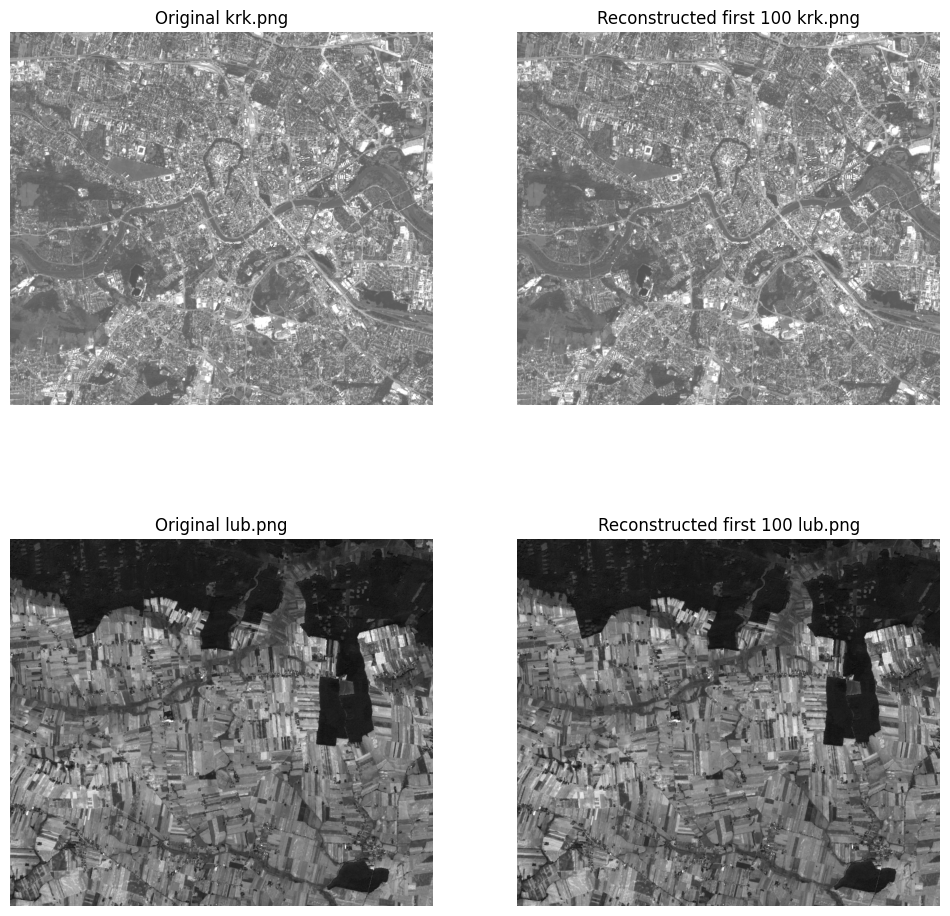

In [9]:
i = 700
j = 0
reconstimg_krk = np.matrix(U_krk[:, j:i]) * np.diag(sigma_krk[j:i]) * np.matrix(V_krk[j:i, :])
reconstimg_lub = np.matrix(U_lub[:, j:i]) * np.diag(sigma_lub[j:i]) * np.matrix(V_lub[j:i, :])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Original krk.png')
plt.imshow(imgmat_krk, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Reconstructed first 100 krk.png')
plt.imshow(reconstimg_krk, cmap='gray')

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Original lub.png')
plt.imshow(imgmat_lub, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Reconstructed first 100 lub.png')
plt.imshow(reconstimg_lub, cmap='gray')